# library 불러오기

In [ ]:
import networkx as nx            ## 네트워크 구성할 때 사용하는 library
import numpy as np               ## 여러가지 행렬계산에 용이한 library(배열)
import matplotlib.pyplot as plt  ## 그래프 그릴 때 사용
import geopandas as gpd          ## geography data 사용하는데 도움을 주는 library

In [ ]:
!pip install geopandas  ## goepandas 설치

In [ ]:
from google.colab import drive    ## 구글 드라이브 마운트
drive.mount('/content/drive/')

# Networkx 기초

$\quad$Networkx 라이브러리는 python에서 네트워크를 쉽게 다룰 수 있게 만들어준다. 네트워크를 쉰게 만들어주며, 여러가지 특징들도 간편하게 측정할 수 있다.

### 네트워크 선언

In [ ]:
Network = nx.DiGraph()     #방향성있는거
Network = nx.Graph()  #방향성 없는거         ## 네트워크 클래스 선언

### 노드 추가 & 확인

### 링크 추가 & 확인

### 네트워크 그리기

### Betweenness Centrality

## <center> $c_B(v) = \sum_{s,\,t\in V}\frac{\sigma_{st}(v)}{\sigma_{st}}$

# 도시 도로네트워크에서 BC 측정하기

## data 불러오기

$\bullet$ 서울 : Seoul_links_190709.csv, Seoul_nodes_190709.csv

$\bullet$ 인천 : Incheon_links_190709.csv, Incheon_nodes_190709.csv

$\bullet$ 대전 : Daejeon_links_190709.csv, Daejeon_nodes_190709.csv

$\bullet$ 부산 : Busan_links_190709.csv, Busan_nodes_190709.csv

$\bullet$ 대구 : Daegu_links_190709.csv, Daegu_nodes_190709.csv

$\bullet$ 광주 : Gwangju_links_190709.csv, Gwangju_nodes_190709.csv

$\bullet$ 울산 : Ulsan_links_190709.csv, Ulsan_nodes_190709.csv

In [ ]:
name = 'Seoul'
link_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_links_190709.csv'.format(name)) ## 링크 리스트
node_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_nodes_190709.csv'.format(name)) ## 노드 리스트

선형회귀용함수

In [ ]:
def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m) # Orthogonal transform so far
    R = A.copy() # Transformed matrix so far

    for j in range(n):
        # Find H = I - beta*u*u' to put zeros below R[j,j]
        x = R[j:, j]
        normx = np.linalg.norm(x)
        rho = -np.sign(x[0])
        u1 = x[0] - rho * normx
        u = x / u1
        u[0] = 1
        beta = -rho * u1 / normx

        R[j:, :] = R[j:, :] - beta * np.outer(u, u).dot(R[j:, :])
        Q[:, j:] = Q[:, j:] - beta * Q[:, j:].dot(np.outer(u, u))
    return Q, R
def linearReg(A):
    m, n = A.shape
    AA = np.array([A[:,0], np.ones(m)]).T
    b = A[:, 1]

    Q, R = qr_householder(AA)
    b_hat = Q.T.dot(b)

    R_upper = R[:n, :]
    b_upper = b_hat[:n]

    x = np.linalg.solve(R_upper, b_upper)
    slope, intercept = x
    return slope, intercept

## node list 확인

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry
0,0,1000001300,101,신설동역,1,,,5,11110,100,,,37.575580863588144,127.02322743284599,None
1,1,1000001400,104,홍지문터널(북측),0,,,5,11110,100,,,37.60590107864166,126.97200381477701,None
2,2,1000001600,101,센츄랄관광호텔,1,,,5,11110,100,,,37.56851769648294,126.99235201551689,None
3,3,1000002000,101,동아일보로터리,0,,,5,11110,100,,,37.56903119299191,126.97710606804017,None
4,4,1000002500,101,종로구청,0,,,5,11110,100,,,37.57246933812343,126.97924213444823,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,7862,2420063900,101,고강공영차고지앞삼거리,0,,nodelinkmanager,5,50000,242,,nodelinkmanager2017091209,37.53794853095832,126.82142656545061,None
7863,7863,2420064900,105,서울-부천경계,0,,nodelinkmanager,5,50000,242,,nodelinkmanager2017091209,37.47616042587632,126.82318680007415,None
7864,7864,2420065200,104,까치울터널서측,0,,nodelinkmanager,5,50000,242,,nodelinkmanager2017091209,37.51350065117455,126.82362604582191,None
7865,7865,2420066700,105,경인고속도로서울-부천경계,0,,nodelinkmanager,5,50000,242,,nodelinkmanager2017091209,37.52376066232631,126.82564457693628,None


## link list 확인

In [ ]:
link_list #from node~to node , lane은 차선수 , shape stle :길이 

,field_1,LINK_ID,F_NODE,T_NODE,ROAD_USE,LANES,ROAD_RANK,ROAD_NAME,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,ROAD_TYPE,ROAD_NO,TMPID,UPLOAD_ID,SOSFNODEID,SOSTNODEID,SHAPE_STLe,geometry
0,0,1500026100,1500002300,1500007300,0,2.0,104,동덕로,0,000,60.0,0,0.0,0.0,,,5,27000,150,000,67,RO2700078900000,,,RN2700026600000,322.948001975,None
1,1,1500026200,1500007300,1500001100,0,2.0,104,동덕로,0,000,60.0,0,0.0,0.0,,,5,27000,150,000,67,RO2700079000000,,RN2700026600000,,348.261953915,None
2,2,1500026300,1500001100,1500007300,0,2.0,104,동덕로,0,000,60.0,0,0.0,0.0,,,5,27000,150,000,67,RO2700079100000,,,RN2700026600000,358.579832351,None
3,3,1500026400,1500007300,1500002300,0,2.0,104,동덕로,0,000,60.0,0,0.0,0.0,,,5,27000,150,000,67,RO2700079200000,,RN2700026600000,,324.96833707,None
4,4,1500026500,1500000400,1500007400,0,5.0,104,달구벌대로,0,000,70.0,0,0.0,0.0,,,5,27000,150,000,40,RO2700079300000,,,RN2700024300000,318.266728548,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,5737,1570686600,1570228200,1570005300,0,2.0,103,일반국도5호선,1,000,70.0,0,0.0,500.0,,geostoryco,5,60170,157,000,5,TMPID20180821212808,geostoryco20180829141113,TMPID20180814154567,,2122.32379899,None
5738,5738,3670014304,3670006601,1570005600,0,3.0,101,광주대구고속도로,0,000,100.0,5,0.0,0.0,기존 링크 분할 수정,geostoryco,5,60170,157,000,12,,geostoryco20180918111311,,,8606.18661634,None
5739,5739,1570030100,3910015900,1570012600,0,2.0,101,중부내륙고속도로,0,000,100.0,5,0.0,0.0,,geostoryco,5,60170,157,000,14,,geostoryco20180918111311,,,15213.0571736,None
5740,5740,1570030500,1570005600,1570005900,0,1.0,101,구마고속도로진입로,0,101,50.0,0,0.0,0.0,,nodelinkmanager,5,50000,157,000,12,RO2700001500000,nodelinkmanager2019011613,,,637.820683505,None


## 네트워크 구축

In [ ]:
## 네트워크 클래스
street_network = nx.DiGraph()
## 노드 추가
for l, e in node_list.iterrows():
    street_network.add_node(int(e['NODE_ID']), POS = (float(e['longitude']), float(e['latitude'])))
## 링크 추가
for l, e in link_list.iterrows():
    street_network.add_edge(int(e['F_NODE']),int(e['T_NODE']),LINK_ID = int(e['field_1']), length = float(e['SHAPE_STLe']), LANES = float(e['LANES']))
## remove wrong data nodes
bad_data = list(street_network.nodes())[0]
if bad_data == 1300000100: street_network.remove_node(1450000800) ## Busan wrong data
elif bad_data == 1830000100: street_network.remove_nodes_from([1865789300, 1865791600]) ## Daejeon wrong data
elif bad_data == 1500000100: street_network.remove_node(1550007800) ## Daegu wrong data

In [ ]:
len(street_network.nodes)

1883

## 노드 & 링크 수 확인

In [ ]:
print('네트워크 노드 수 : ',len(street_network.nodes))
print('네트워크 링크 수 : ',len(street_network.edges))

네트워크 노드 수 :  1883
네트워크 링크 수 :  5732


## 네트워크 그리기

## 네트워크 BC 확인
(BC,PDF)그리기, (BC,ICDF)그리기, degree distridution 그리기, 
bins:100d을 len(Network,nodes()) 로 바꾸기 

In [ ]:
BC = nx.betweenness_centrality(street_network)


In [ ]:

bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
1905,1905,1070000900,104,정릉터널(북측),0,,,5,11290,107,,,37.60978343567257,126.99216592944164,None,0.162546
3188,3188,1120001300,104,홍지문터널(남측),0,,,5,11410,112,,,37.59582381226682,126.95654529055572,None,0.159881
225,225,1000029400,105,종로구-성북구경계(6),0,,,5,11110,100,,,37.60918596093672,126.98564918212699,None,0.155582
219,219,1000028700,104,정릉터널(남측),0,,,5,11110,100,,,37.606930256378504,126.97390899562865,None,0.155549
1,1,1000001400,104,홍지문터널(북측),0,,,5,11110,100,,,37.60590107864166,126.97200381477701,None,0.155528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,3142,1110020900,102,개미연립,0,,,5,11380,111,,,37.62537386650315,126.91158960417253,None,0.000000
7414,7414,1230057700,108,올림픽대로-일반국도43,0,,,5,11710,123,,,37.54034543510939,127.11971903027684,None,0.000000
6116,6116,1200028000,103,보성운수,0,더미노드,,5,11620,120,TMP201410N10090,,37.46421810674006,126.9188721508756,None,0.000000
2191,2191,1070037500,102,피오레아파트,0,,,5,11290,107,,,37.617325750272315,127.00038984830299,None,0.000000


In [ ]:
highest_BC_node=int(node_list.values.tolist()[0][1]) # 정렬된 노드리스트를 list로 바꾼 후, 거기서 가장 첫번째 줄의 두번째 값인 NODE_ID를 정의한다 
highest_BC_node_label = int(node_list.values.tolist()[0][0])
node_list = node_list.drop(highest_BC_node_label)
street_network.remove_node(highest_BC_node) #그 NODE ID를 제거한다 


In [ ]:
len(street_network.nodes)

1882

In [ ]:
BC = nx.betweenness_centrality(street_network)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
1194,1194,1560004000,108,성서IC,0,,,5,,156,,,35.85332399414642,128.5221710130333,None,0.255151
1175,1175,1560001600,108,남대구IC,0,,,5,,156,,,35.837976993972774,128.52778401323877,None,0.248243
1172,1172,1560001300,108,남대구IC,0,,,5,,156,,,35.83614699344536,128.5271200128844,None,0.239350
1458,1458,1560098100,108,유천IC(북측),0,,geostoryco,5,60170,156,TMPID20180518180158,geostoryco20180530184123,35.819106945633145,128.51000013120435,None,0.238402
1675,1675,1570186100,108,유천IC(남측),0,,geostoryco,5,60170,157,TMPID20180518180157,geostoryco20180530184123,35.811949011819735,128.50254687625116,None,0.234496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,1715,1570194100,101,유림침장앞삼거리,0,,geostoryco,5,60170,157,TMPID20180709170734,geostoryco20180731130723,35.64107501569859,128.41333079380425,None,0.000000
443,443,1520006700,103,-,0,,dgsi,5,27000,152,,,35.88871999348488,128.54343601387293,None,0.000000
458,458,1520008200,103,구마콘크리트산업사,0,,,5,27000,152,RN2700027800000,,35.88002969789639,128.53382609361273,None,0.000000
460,460,1520008400,102,북비산초등교입구,0,,,5,27000,152,RN2700023500000,,35.882829380869,128.5631555326846,None,0.000000


In [ ]:
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
877,877,1540034500,101,구암공원앞,0,,,5,27000,154,RN2700010600000,,35.92751210985482,128.5560707911717,None,0.223528
1080,1080,1550014400,101,-,0,,dgsi,5,27000,155,,,35.855775993610955,128.60871101337435,None,0.220970
1767,1767,1570199300,101,한국소방기구제작소,0,,geostoryco,5,60170,157,TMPID20180709170733,geostoryco20180731130723,35.639898063940095,128.4313203301631,None,0.199833
584,584,1540003900,101,-,0,,dgsi,5,27000,154,,,35.903667994035466,128.5468210130124,None,0.189765
1698,1698,1570192400,101,구지면 창리 744-1,0,,geostoryco,5,60170,157,TMPID20180709170833,geostoryco20180731130723,35.65647794835758,128.4048831288754,None,0.180459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,1510003500,101,등촌네거리,0,,dgsi,5,27000,151,,,35.887397994056734,128.65192901363287,None,0.000000
62,62,1500006300,104,신천교서편,0,,dgsi,5,27000,150,,,35.87356799346795,128.6111500134005,None,0.000000
606,606,1540007000,108,칠곡IC,0,,,5,,154,,,35.93893099438711,128.5369840139234,None,0.000000
569,569,1540002100,101,-,0,,dgsi,5,27000,154,,,35.897699993625515,128.54885501280705,None,0.000000


In [ ]:
name = 'Daegu'
link_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_links_190709.csv'.format(name)) ## 링크 리스트
node_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_nodes_190709.csv'.format(name)) ## 노드 리스트
## 네트워크 클래스
street_network = nx.DiGraph()
## 노드 추가
for l, e in node_list.iterrows():
    street_network.add_node(int(e['NODE_ID']), POS = (float(e['longitude']), float(e['latitude'])))
## 링크 추가
for l, e in link_list.iterrows():
    street_network.add_edge(int(e['F_NODE']),int(e['T_NODE']),LINK_ID = int(e['field_1']), length = float(e['SHAPE_STLe']), LANES = float(e['LANES']))
## remove wrong data nodes
bad_data = list(street_network.nodes())[0]
if bad_data == 1300000100: street_network.remove_node(1450000800) ## Busan wrong data
elif bad_data == 1830000100: street_network.remove_nodes_from([1865789300, 1865791600]) ## Daejeon wrong data
elif bad_data == 1500000100: street_network.remove_node(1550007800) ## Daegu wrong data
BC = nx.betweenness_centrality(street_network)
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
secondhighest_BC_node=int(node_list.values.tolist()[1][1]) # 정렬된 노드리스트를 list로 바꾼 후, 거기서 가장 첫번째 줄의 두번째 값인 NODE_ID를 정의한다 
secondhighest_BC_node_label = int(node_list.values.tolist()[1][0])
node_list = node_list.drop(secondhighest_BC_node_label)
street_network.remove_node(secondhighest_BC_node) #그 NODE ID를 제거한다

In [ ]:
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
1727,1727,1570195300,101,구지면 응암리 962-11,0,,geostoryco,5,60170,157,TMPID20180709170735,geostoryco20180731130723,35.64496037212585,128.41771925181587,None,0.261248
476,476,1530001000,104,대명고가차도,0,,dgsi,5,27000,153,,,35.83172499444611,128.56625901306714,None,0.248243
860,860,1540032800,101,태경,0,,,5,27000,154,RN2700001500000,,35.90997994398286,128.61223597499875,None,0.239350
1080,1080,1550014400,101,-,0,,dgsi,5,27000,155,,,35.855775993610955,128.60871101337435,None,0.238402
877,877,1540034500,101,구암공원앞,0,,,5,27000,154,RN2700010600000,,35.92751210985482,128.5560707911717,None,0.234496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,1510011900,101,공고네거리,1,,dgsi,5,27000,151,,,35.88115599360008,128.61409401353376,None,0.000000
216,216,1510013200,101,백안사거리,0,,dgsi,5,27000,151,,,35.95387599457904,128.69069901372814,None,0.000000
1792,1792,1570201800,101,다사읍 세천리 1668-4,0,,geostoryco,5,60170,157,TMPIDN20180719125276,geostoryco20180731130723,35.87699071575182,128.47107070499865,None,0.000000
1858,1858,3670006300,105,고령교,0,,dgsi,5,27000,367,,,35.752875993908326,128.38703001393344,None,0.000000


In [ ]:
name = 'Daegu'
link_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_links_190709.csv'.format(name)) ## 링크 리스트
node_list = gpd.read_file('/content/drive/My Drive/용성이형/korea_street_network/{0}_nodes_190709.csv'.format(name)) ## 노드 리스트
## 네트워크 클래스
street_network = nx.DiGraph()
## 노드 추가
for l, e in node_list.iterrows():
    street_network.add_node(int(e['NODE_ID']), POS = (float(e['longitude']), float(e['latitude'])))
## 링크 추가
for l, e in link_list.iterrows():
    street_network.add_edge(int(e['F_NODE']),int(e['T_NODE']),LINK_ID = int(e['field_1']), length = float(e['SHAPE_STLe']), LANES = float(e['LANES']))
## remove wrong data nodes
bad_data = list(street_network.nodes())[0]
if bad_data == 1300000100: street_network.remove_node(1450000800) ## Busan wrong data
elif bad_data == 1830000100: street_network.remove_nodes_from([1865789300, 1865791600]) ## Daejeon wrong data
elif bad_data == 1500000100: street_network.remove_node(1550007800) ## Daegu wrong data
BC = nx.betweenness_centrality(street_network)
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
thirdhighest_BC_node=int(node_list.values.tolist()[2][1]) # 정렬된 노드리스트를 list로 바꾼 후, 거기서 가장 첫번째 줄의 두번째 값인 NODE_ID를 정의한다 
thirdhighest_BC_node_label = int(node_list.values.tolist()[2][0])
node_list = node_list.drop(thirdhighest_BC_node_label)
street_network.remove_node(thirdhighest_BC_node) #그 NODE ID를 제거한다

In [ ]:
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
1727,1727,1570195300,101,구지면 응암리 962-11,0,,geostoryco,5,60170,157,TMPID20180709170735,geostoryco20180731130723,35.64496037212585,128.41771925181587,None,0.261248
1591,1591,1570061800,104,성산대교(동측),0,,mappers,5,60190,157,TMPID20160820091,mappers20161007133943,35.75277520344689,128.39513364941246,None,0.255151
860,860,1540032800,101,태경,0,,,5,27000,154,RN2700001500000,,35.90997994398286,128.61223597499875,None,0.239350
1080,1080,1550014400,101,-,0,,dgsi,5,27000,155,,,35.855775993610955,128.60871101337435,None,0.238402
877,877,1540034500,101,구암공원앞,0,,,5,27000,154,RN2700010600000,,35.92751210985482,128.5560707911717,None,0.234496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,1510011900,101,공고네거리,1,,dgsi,5,27000,151,,,35.88115599360008,128.61409401353376,None,0.000000
216,216,1510013200,101,백안사거리,0,,dgsi,5,27000,151,,,35.95387599457904,128.69069901372814,None,0.000000
1792,1792,1570201800,101,다사읍 세천리 1668-4,0,,geostoryco,5,60170,157,TMPIDN20180719125276,geostoryco20180731130723,35.87699071575182,128.47107070499865,None,0.000000
1858,1858,3670006300,105,고령교,0,,dgsi,5,27000,367,,,35.752875993908326,128.38703001393344,None,0.000000


In [ ]:
len(street_network.nodes)

1882

In [ ]:
BC = nx.betweenness_centrality(street_network)

In [ ]:
bc_value=np.zeros(len(street_network.nodes)) #도시의 노드 수 만큼의 0을 가지고 있는 array를 만든다
n=0
for i in street_network.nodes :
  if n==len(street_network.nodes): break
  bc_value[n]=BC[i] 
  n+=1 #n을 1씩 늘려가며 0으로 가득찬 bc_value 방들에 계산한 BC를 넣어준다

node_list['BC']=bc_value #위에 pandas에 'BC'라는 항목을 추가해주고 그안에 최신화한 bc_value array를 넣어준다
node_list=node_list.sort_values('BC',ascending=False)

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
877,877,1540034500,101,구암공원앞,0,,,5,27000,154,RN2700010600000,,35.92751210985482,128.5560707911717,None,0.223528
1080,1080,1550014400,101,-,0,,dgsi,5,27000,155,,,35.855775993610955,128.60871101337435,None,0.220970
1767,1767,1570199300,101,한국소방기구제작소,0,,geostoryco,5,60170,157,TMPID20180709170733,geostoryco20180731130723,35.639898063940095,128.4313203301631,None,0.199833
584,584,1540003900,101,-,0,,dgsi,5,27000,154,,,35.903667994035466,128.5468210130124,None,0.189765
1698,1698,1570192400,101,구지면 창리 744-1,0,,geostoryco,5,60170,157,TMPID20180709170833,geostoryco20180731130723,35.65647794835758,128.4048831288754,None,0.180459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,1510003500,101,등촌네거리,0,,dgsi,5,27000,151,,,35.887397994056734,128.65192901363287,None,0.000000
62,62,1500006300,104,신천교서편,0,,dgsi,5,27000,150,,,35.87356799346795,128.6111500134005,None,0.000000
606,606,1540007000,108,칠곡IC,0,,,5,,154,,,35.93893099438711,128.5369840139234,None,0.000000
569,569,1540002100,101,-,0,,dgsi,5,27000,154,,,35.897699993625515,128.54885501280705,None,0.000000


In [ ]:
highest_BC_node=int(node_list.values.tolist()[0][1]) # 정렬된 노드리스트를 list로 바꾼 후, 거기서 가장 첫번째 줄의 두번째 값인 NODE_ID를 정의한다 
highest_BC_node_label = int(node_list.values.tolist()[0][0])
node_list = node_list.drop(highest_BC_node_label)
street_network.remove_node(highest_BC_node) #그 NODE ID를 제거한다

In [ ]:
BC = nx.betweenness_centrality(street_network)

In [ ]:
len(street_network.nodes)

NameError: ignored

In [ ]:
node_list

,field_1,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude,geometry,BC
1080,1080,1550014400,101,-,0,,dgsi,5,27000,155,,,35.855775993610955,128.60871101337435,None,0.220970
1767,1767,1570199300,101,한국소방기구제작소,0,,geostoryco,5,60170,157,TMPID20180709170733,geostoryco20180731130723,35.639898063940095,128.4313203301631,None,0.199833
584,584,1540003900,101,-,0,,dgsi,5,27000,154,,,35.903667994035466,128.5468210130124,None,0.189765
1698,1698,1570192400,101,구지면 창리 744-1,0,,geostoryco,5,60170,157,TMPID20180709170833,geostoryco20180731130723,35.65647794835758,128.4048831288754,None,0.180459
1136,1136,1550020000,101,매호초등학교앞,0,,,5,27000,155,RN2700011000000,,35.84224810845371,128.7113755451097,None,0.170661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,1510003500,101,등촌네거리,0,,dgsi,5,27000,151,,,35.887397994056734,128.65192901363287,None,0.000000
62,62,1500006300,104,신천교서편,0,,dgsi,5,27000,150,,,35.87356799346795,128.6111500134005,None,0.000000
606,606,1540007000,108,칠곡IC,0,,,5,,154,,,35.93893099438711,128.5369840139234,None,0.000000
569,569,1540002100,101,-,0,,dgsi,5,27000,154,,,35.897699993625515,128.54885501280705,None,0.000000


In [ ]:
hist,bins=np.histogram(list(BC.values()),1000)       ## 히스토그램

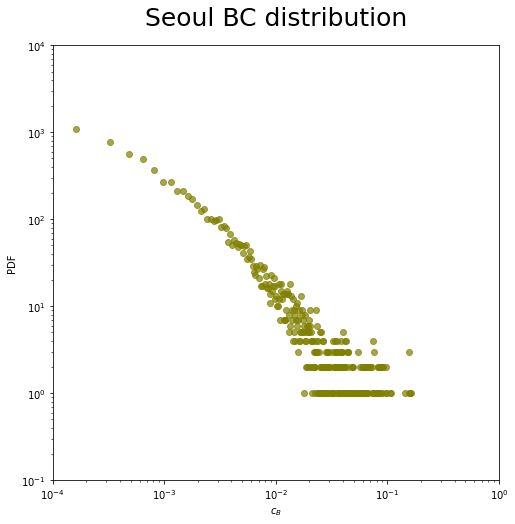

exponent = 1.2084911782892964


In [ ]:
hist_BC,bins_BC=np.histogram(list(BC.values()),bins)        ## 히스토그램
hist_re=hist[np.where(hist>0)]
x_hist=bins[1:1001][np.where(hist>0)]

min_BC,max_BC = min(x_hist),min(x_hist)*50  
x_hist =  x_hist[x_hist<=max_BC]
x_hist = x_hist[x_hist>=min_BC]

hist_re=hist_re[:len(x_hist)]
linear_hist=[list(x_hist),list(hist_re)]
plt.figure(figsize=(8,8))

a,b=linearReg(np.log10(np.array(linear_hist).T[1:]))
#plt.plot([10**(np.log10(x_hist[1])),10**(np.log10(x_hist[-1]))],[10**((np.log10(x_hist[1]))*a+b),10**(np.log10(x_hist[-1])*a+b)],'r:')

plt.title('Seoul BC distribution',fontsize = 25, pad = 20)                ## 제목
plt.scatter(bins[1:1001],hist,c='olive',alpha=0.7)

    ## 그래프 그리기

plt.xscale('log')                                    ## x 스케일 : log
plt.yscale('log')                                    ## y 스케일 : log
plt.ylim(1e-1,1e4)                                   ## 그래프의 x축 범위
plt.xlim(1e-4,1e0)                                   ## 그래프의 y축 범위
plt.xlabel(r'$c_B$')                                 ## x축 라벨
plt.ylabel('PDF')                                    ## y축 라벨
plt.tight_layout                                     ## 그림, 글자 겹치지 않게 해주는 명령어
plt.savefig('/content/drive/My Drive/용성이형/seouln ',dpi=300,transparent=True)  
plt.show()
print('exponent =', -a)


In [ ]:
#hist_re=hist[np.where(hist>0)]
#x_hist=bins[1:1001][np.where(hist>0)]
##     x_hist = x_hist[x_hist<=10]
#hist_re=hist_re[:len(x_hist)]
#linear_hist=[list(x_hist),list(hist_re)]
#plt.figure(figsize=(8,8))

#a,b=linearReg(np.log10(np.array(linear_hist).T[1:]))
#plt.plot([10**(np.log10(x_hist[1])),10**(np.log10(x_hist[-1]))],[10**((np.log10(x_hist[1]))*a+b),10**(np.log10(x_hist[-1])*a+b)],'r:')
#plt.title('Seoul PDF',fontsize = 25, pad = 20)                ## 제목
#plt.scatter(bins[1:1001],hist,c='olive',alpha=0.7)    ## 그래프 그리기
#plt.xscale('log')                                    ## x 스케일 : log
#plt.yscale('log')                                    ## y 스케일 : log
#plt.ylim(1e-1,1e3)                                   ## 그래프의 x축 범위
#plt.xlim(1e-4,1e0)                                   ## 그래프의 y축 범위
#plt.xlabel(r'$c_B$')                                 ## x축 라벨
#plt.ylabel('PDF')                                    ## y축 라벨
#plt.tight_layout                                     ## 그림, 글자 겹치지 않게 해주는 명령어
#plt.savefig('/content/drive/My Drive/용성이형/Seoul ',dpi=300,transparent=True)  
#plt.show()
#print('exponent =', -a)


degree distribution 그리기

In [ ]:
from collections import Counter

degree_list = []

for i in Seoul_street_network.nodes:
  if Seoul_street_network.degree(i) == 16: print(i)
  degree_list.append(Seoul_street_network.degree(i))

count = Counter(degree_list)

In [ ]:
degree_result = []
degree_list = []
for i in count:
  degree_list.append(i)
  degree_result.append(count[i])

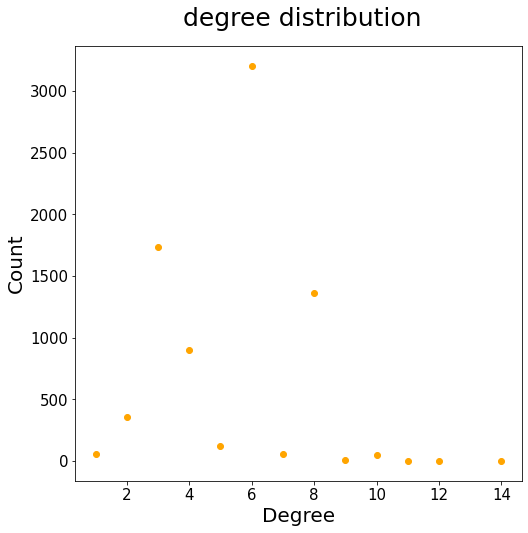

In [ ]:
fig = plt.figure(figsize = (8,8))
#fig = plt.gca()
fig.set_facecolor('white')
plt.scatter(degree_list,degree_result,c='orange')
plt.title(' degree distribution', fontsize = 25, pad = 20)
plt.xlabel('Degree', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('/content/drive/My Drive/용성이형/Seoul_digree',dpi=300)
plt.show()

icdf그리기

In [ ]:
sum_hist = sum(hist)
cdf = []
for i in range(len(hist)):
  cdf.append(sum_hist)
  sum_hist -= hist[i]

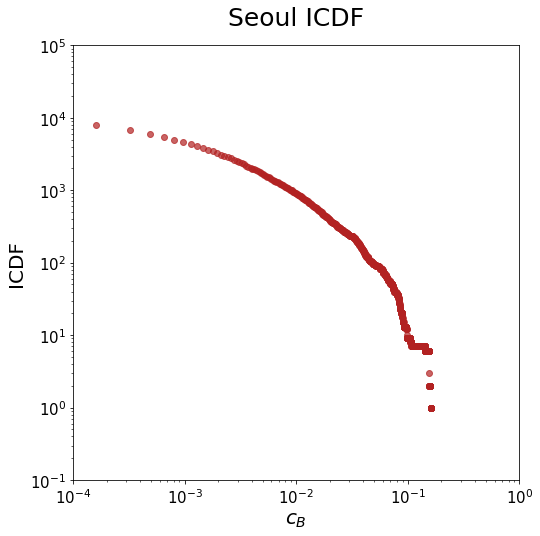

In [ ]:
plt.figure(figsize=(8,8))




plt.title('Seoul ICDF', fontsize = 25, pad = 20)                  ## 제목
plt.scatter(bins[1:1001],cdf,c='firebrick',alpha=0.7)    ## 그래프 그리기
plt.xscale('log')                                    ## x 스케일 : log
plt.yscale('log')                                    ## y 스케일 : log
plt.ylim(1e-1,1e5)                                   ## 그래프의 x축 범위
plt.xlim(1e-4,1e0)                                   ## 그래프의 y축 범위
plt.xlabel(r'$c_B$',fontsize = 20)                                 ## x축 라벨
plt.ylabel('ICDF',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)                                    ## y축 라벨
plt.tight_layout
plt.savefig('/content/drive/My Drive/용성이형/Seoul_icDF',dpi=300)
plt.show()

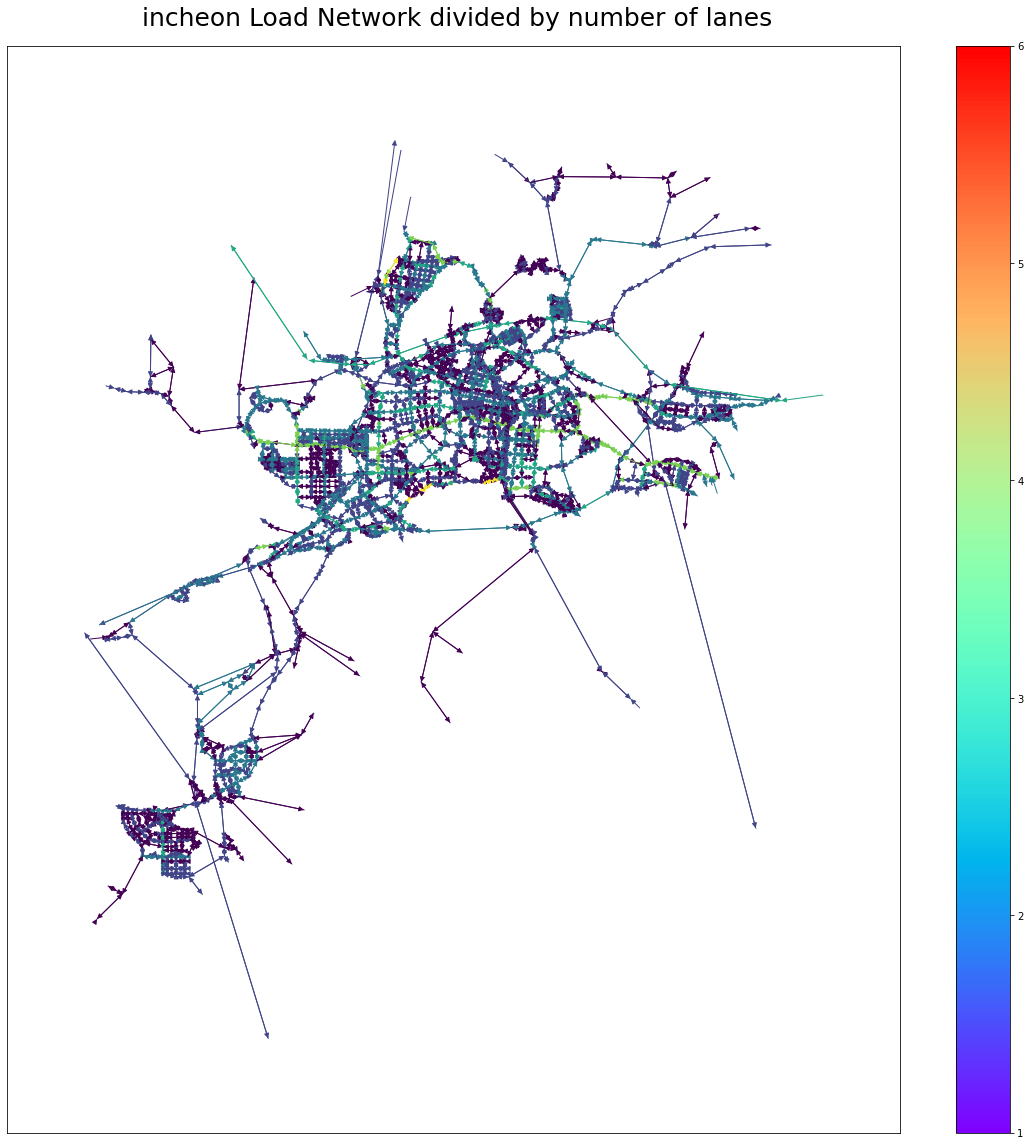

In [ ]:
import pandas as pd
from matplotlib import cm
lanes = pd.DataFrame(list(street_network.edges(data='LANES')), columns = ['F_NODE', 'T_NODE', 'LANES'])

plt.figure(figsize=(20,20))
colors = lanes['LANES']
vmin = min(colors)
vmax = max(colors)
nx.draw_networkx(street_network,
                 pos=street_network.nodes(data='POS'), 
                 node_size=0.01,
                 with_labels=False,
                 edge_color = colors, 
                 cmap=cm.rainbow,
                 edge_vmin = vmin,
                 edge_vmax = vmax
                 )
#except:
#  nx.draw_networkx_edges(street_network, pos=street_network.nodes(data='POS'),arrowsize=0.01, with_labels=False)
#plt.ylim(float(node_list['latitude'][700])-0.001,float(node_list['latitude'][700]) + 0.001)
#plt.xlim(float(node_list['longitude'][700])-0.001,float(node_list['longitude'][700]) + 0.001)
sm = plt.cm.ScalarMappable(cmap=cm.rainbow, norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.title(' incheon Load Network divided by number of lanes', fontsize = 25, pad = 20)
plt.colorbar(sm)
plt.savefig('/content/drive/My Drive/용성이형/incheon_net',dpi=300)
plt.show()

In [ ]:

'''기존 네트워크 생성'''
node_list = node_list
link_list = link_list
street_network = nx.DiGraph()
## 노드 추가
for l, e in node_list.iterrows():
  street_network.add_node(int(e['NODE_ID']), POS = (float(e['longitude']), float(e['latitude'])))
## 링크 추가
for l, e in link_list.iterrows():
  street_network.add_edge(int(e['F_NODE']),int(e['T_NODE']),LINK_ID = int(e['field_1']), length = float(e['SHAPE_STLe']), LANES = float(e['LANES']))

''' BC 계산 '''
network_name = street_network #각자 network 이름에 맞게 변경 ex : seoul_network
BC = nx.betweenness_centrality(network_name) ## 기존 네트워크 BC 계산

percent = 0.001 # 제거 할 상위 % 설정

#BC 값 array 타입으로 변환
bc_value = np.zeros(len(network_name.nodes))
n = 0
for i in network_name.nodes:
  if n == len(network_name.nodes): break
  bc_value[n] = BC[i]
  n += 1

if percent != 0.001:
  '''상위 BC node 제거'''
  #오름 및 내림차순 정렬
  node_list['BC'] = bc_value
  node_list = node_list.sort_values('BC', ascending = False)

  #index 재정렬
  column_labels = node_list.columns
  node_list = node_list.values.tolist()
  node_list = pd.DataFrame(node_list, columns = column_labels)

  #BC 높은 node 제거
  remove_list = np.array((node_list['NODE_ID'][:int(len(node_list)*percent)+1]),float) 
  network_name.remove_nodes_from(remove_list)

  '''node 제거 후 BC 재계산'''
  BC = nx.betweenness_centrality(network_name) ## node 제거 후 BC 계산

  #BC 값 array에 저장
  bc_value = np.zeros(len(network_name.nodes),float)
  n = 0
  for i in network_name.nodes:
    if n == len(network_name.nodes): break
    bc_value[n] = BC[i]
    n += 1

IndexError: ignored

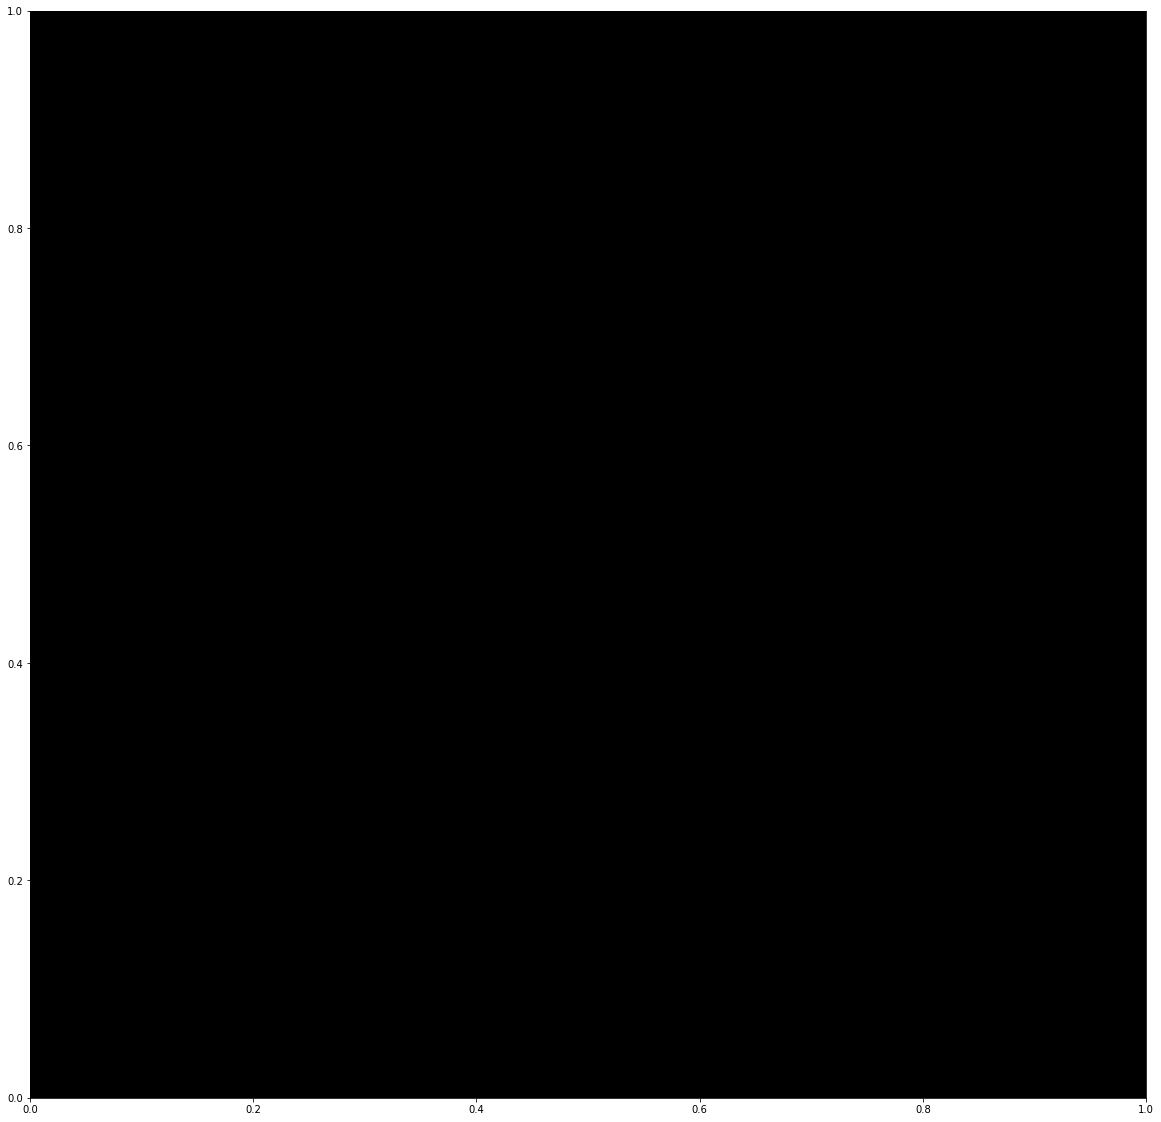

In [ ]:
from math import *

#colorbar 라벨 지수함수 형태로
def cb_log_label(tick_label):
  for i in range(len(tick_label)):
    if float(tick_label[i]) - int(float(tick_label[i])) == 0:
      tick_label[i] = r'$10^{0}$'.format('{' + tick_label[i] + '}')
    else:
      tick_label[i] = ''

  return tick_label

'''도로 네트워크 그래프 설정'''
fig = plt.figure(figsize=(20,20))
fig = plt.gca() 
fig.set_facecolor('black') #배경 검은색

colors = bc_value #BC값 colorbar에 적용

if min(colors)  == 0:
  vmin = min(colors) + 0.001 #최저 값이 0일 경우 배경색과 edge 색이 겹쳐서 안보이므로, 이를 방지하기 위해 + 0.001
else:  
  vmin = min(colors)
vmax = max(colors)

cmap = cm.magma #colorbar 색 설정

#도로 네트워크 그리기
nx.draw_networkx(network_name,
                 pos=network_name.nodes(data='POS'), 
                 node_size=15,
                 with_labels=False, 
                 node_color = colors,
                 edge_color = [0.04]*len(network_name.edges), #edge색 colorbar의 색 중 하나로 설정
                 cmap = cmap,
                 edge_cmap = cmap,
                 edge_vmin = vmin,
                 edge_vmax = vmax,
                 arrows = False
                 )

'''Colorbar 설정'''
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=log10(vmin), vmax=log10(vmax))) #log scale 적용
cb = plt.colorbar(sm)
cb_label = list(np.arange(int(log10(vmin)),int(log10(vmin))+0.5*5,0.5))
cb_label = list(map(str,cb_label))
cb.ax.set_yticklabels(cb_log_label(cb_label))
cb.set_label('Betweenness centrality', fontsize = 40, labelpad = 30)

#Colorbar tick size 설정
for t in cb.ax.get_yticklabels():
    t.set_fontsize(30)

plt.title('{0} traffic network', fontsize = 50, pad = 30)

plt.savefig('/content/drive/My Drive/용성이형/Seoul_PDF',dpi=300,transparent=True) 

plt.show()